In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

#Classification
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
def classification_(x,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)

In [3]:
df = pd.read_csv("failure.csv")
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [7]:
del df["date"]
del df["device"]

In [8]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [9]:
abs(df.corr()["failure"]).sort_values(ascending = False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
month         0.000321
year               NaN
Name: failure, dtype: float64

In [10]:
q = df.quantile(0.99)
for col in ("attribute7","attribute8","attribute4","attribute2","attribute5","attribute1","attribute9","attribute3","attribute6"):
    df = df[(df[col]<q[col])]

In [11]:
y = df["failure"]
x = df.drop("failure",axis=1)
x = pd.get_dummies(x,drop_first=True)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [13]:
classification_(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Multinominal,0.578581,0.000516,0.357143,0.001031
Gaussian,0.999391,0.000000,0.000000,0.000000
Bernoulli,0.999217,0.000000,0.000000,0.000000
KNeigbors,0.999391,0.000000,0.000000,0.000000
SVC,0.999391,0.000000,0.000000,0.000000
DecisionTree,0.999000,0.000000,0.000000,0.000000
LogisticRegr,0.999391,0.000000,0.000000,0.000000
GradientBoosting,0.999348,0.000000,0.000000,0.000000
RandomForest,0.999348,0.000000,0.000000,0.000000
AdaBoost,0.999348,0.000000,0.000000,0.000000


In [14]:
# class count
class_count_0, class_count_1 = df['failure'].value_counts()

# Separate class
class_0 = df[df['failure'] == 0]
class_1 = df[df['failure'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (114896, 13)
class 1: (48, 13)


## Random Under-Sampling

total class of 1 and0: 0    48
1    48
Name: failure, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

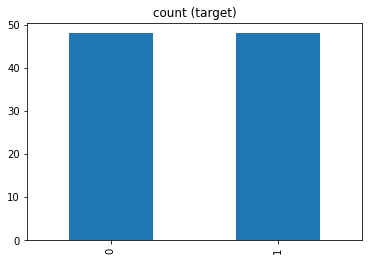

In [15]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['failure'].value_counts())# plot the count after under-sampeling
test_under['failure'].value_counts().plot(kind='bar', title='count (target)')

## Random Over-Sampling

total class of 1 and 0: 0    48
1    48
Name: failure, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

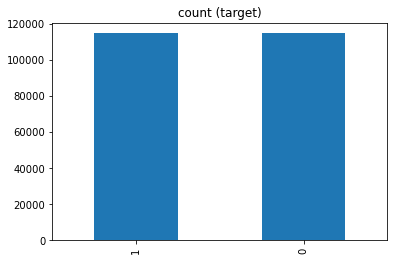

In [16]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['failure'].value_counts())# plot the count after under-sampeling
test_over['failure'].value_counts().plot(kind='bar', title='count (target)')

## Random under-sampling with imblearn

In [17]:
# import library
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 114896, 1: 48})
Resample dataset shape Counter({0: 48, 1: 48})


In [18]:
classification_(x_rus,y_rus)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
GradientBoosting,0.80,0.692308,1.000000,0.818182
RandomForest,0.80,0.777778,0.777778,0.777778
KNeigbors,0.70,0.636364,0.777778,0.700000
LogisticRegr,0.45,0.450000,1.000000,0.620690
Multinominal,0.65,0.625000,0.555556,0.588235
Bernoulli,0.70,0.800000,0.444444,0.571429
AdaBoost,0.70,0.800000,0.444444,0.571429
DecisionTree,0.60,0.555556,0.555556,0.555556
SVC,0.40,0.411765,0.777778,0.538462
Gaussian,0.40,0.200000,0.111111,0.142857


## Random over-sampling with imblearn

In [19]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

#fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 114896, 1: 48})
Resample dataset shape Counter({0: 114896, 1: 114896})


In [20]:
classification_(x_ros,y_ros)

## Under-sampling: Tomek links

In [21]:
# import library
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 114896, 1: 48})
Resample dataset shape Counter({0: 114896, 1: 114896})


In [22]:
classification_(x_tl,y_tl)

## Synthetic Minority Oversampling Technique (SMOTE)

In [23]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 114896, 1: 48})
Resample dataset shape Counter({0: 114896, 1: 114896})


In [24]:
classification_(x_smote,y_smote)

## NearMiss

In [25]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 114896, 1: 48})
Resample dataset shape: Counter({0: 48, 1: 48})


In [26]:
classification_(x_nm,y_nm)

source : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/